In [4]:
import numpy as np
import os
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import glob
import pandas as pd
sns.set_style('darkgrid')
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
from math import ceil

In [2]:
file_path = # Input your file path here

In [ ]:
# areas_selected = ['Italy', 'United Kingdom',
#        'Spain', 'Germany', 'Poland',
#         'Netherlands']


In [ ]:
import geopandas as gpd

# Import Geo Data
world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))
europe = world[world['continent'] == 'Europe']


In [ ]:
areas_selected_code = list(europe['iso_a3'])[:-1]

In [ ]:
areas_selected = list(europe['name'])
areas_selected = areas_selected + ['Russian Federation', 'Republic of Moldova', 'Bosnia and Herzegovina']

## **Target:** Gross Production of Tomatoes

In [5]:
# Read data
target = pd.read_csv(file_path + 'gross production value_tomato.csv')

# Rename and filter
target['Area'] = target['Area'].replace('United Kingdom of Great Britain and Northern Ireland', 'United Kingdom')
target['Area'] = target['Area'].replace('Netherlands (Kingdom of the)', 'Netherlands')
target = target[target['Element'] == 'Gross Production Value (constant 2014-2016 thousand US$)']

target.head()

,Domain Code,Domain,Area Code,Area,Element Code,Element,Item Code,Item,Year Code,Year,Unit,Value,Flag,Flag Description
178,QV,Value of Agricultural Production,3,Albania,58,Gross Production Value (constant 2014-2016 tho...,388,Tomatoes,1961,1961,1000 USD,14502,E,Estimated value
179,QV,Value of Agricultural Production,3,Albania,58,Gross Production Value (constant 2014-2016 tho...,388,Tomatoes,1962,1962,1000 USD,14502,E,Estimated value
180,QV,Value of Agricultural Production,3,Albania,58,Gross Production Value (constant 2014-2016 tho...,388,Tomatoes,1963,1963,1000 USD,14985,E,Estimated value
181,QV,Value of Agricultural Production,3,Albania,58,Gross Production Value (constant 2014-2016 tho...,388,Tomatoes,1964,1964,1000 USD,15469,E,Estimated value
182,QV,Value of Agricultural Production,3,Albania,58,Gross Production Value (constant 2014-2016 tho...,388,Tomatoes,1965,1965,1000 USD,15469,E,Estimated value


In [ ]:
target = target.loc[target['Area'].isin(areas_selected), ['Area', 'Year', 'Value']]
target.columns = ['Country', 'Year', 'Target']
target = target[['Year', 'Country', 'Target']]
target.head()

,Year,Country,Target
178,1961,Albania,14502
179,1962,Albania,14502
180,1963,Albania,14985
181,1964,Albania,15469
182,1965,Albania,15469


## **Production/Supply** Factors

### Pesticides

In [ ]:
# Read Data
pesticides = pd.read_csv(file_path + 'Pesticides indicators (Land, Inputs and Sustainability).csv')

In [ ]:
name = pesticides['Domain'][0] + ' (' + pesticides['Unit'][0] + ')'

# Replacing specific country names for consistency
pesticides['Area'] = pesticides['Area'].replace('Serbia and Montenegro', 'Serbia')
pesticides['Area'] = pesticides['Area'].replace('United Kingdom of Great Britain and Northern Ireland', 'United Kingdom')
pesticides['Area'] = pesticides['Area'].replace('Netherlands (Kingdom of the)', 'Netherlands')

In [ ]:
# Filtering data based on selected areas
pesticides = pesticides.loc[pesticides['Area'].isin(areas_selected), ['Area', 'Element', 'Year', 'Value']]

# Filtering data for a specific element ('Use per value of agricultural production')
pesticides = pesticides.loc[pesticides['Element'] == 'Use per value of agricultural production', ['Area', 'Year', 'Value']]

In [ ]:
pesticides = pesticides.rename(columns = {'Value': name})

In [ ]:
pesticides[pesticides['Area'] == 'Serbia']

,Area,Year,Pesticides indicators (kg/ha)
11987,Serbia,1992,0.29
11988,Serbia,1993,0.40
11989,Serbia,1994,0.34
11990,Serbia,1995,0.29
11991,Serbia,1996,0.28
11992,Serbia,1997,0.24
11993,Serbia,1998,0.26
11994,Serbia,1999,0.27
11995,Serbia,2000,0.31
11996,Serbia,2001,0.26


### Fertilizer Comsumption (Nutritional Breakdown by )

https://www.ifastat.org/databases/plant-nutrition

In [ ]:
# Read Data
nutrition = pd.read_excel(file_path + '/IFADATA Plant Nutrition query - 16-Aug-2023_04.08.xlsx')

In [ ]:
nutrition['Country'].unique()

array(['Morocco', 'Libya', 'Jordan', 'Pakistan', 'Norway', 'Ireland',
       'Argentina', 'Spain', 'Korea DPR', 'Trinidad and Tobago',
       'Romania', 'France', 'Nigeria', 'Croatia', 'Serbia', 'Kuwait',
       'Kazakhstan', 'Viet Nam', 'Kyrgyzstan', 'Tanzania', 'Lebanon',
       'Tunisia', 'Qatar', 'North Macedonia', 'Myanmar', 'Venezuela',
       'Sri Lanka', 'Germany', 'Indonesia', 'Switzerland', 'Italy',
       'Saudi Arabia', 'Cameroon', 'Nepal', 'Finland', 'Bangladesh',
       'Zimbabwe', 'Greece', 'Ecuador', 'Iceland',
       'Belgium and Luxemburg', 'Costa Rica', 'China', 'Taiwan, China',
       'Iran', 'India', 'Sudan', 'Chile', 'Colombia', "Côte d'Ivoire",
       'U.S.A.', 'Mexico', 'Nicaragua', 'Estonia', 'Senegal', 'Austria',
       'New Zealand', 'South Africa', 'Azerbaijan', 'Belarus', 'Latvia',
       'Iraq', 'Bulgaria', 'Brazil', 'Lithuania', 'Georgia', 'Kenya',
       'Poland', 'Czechia', 'Russian Federation', 'Slovenia', 'Zambia',
       'Israel', 'Peru', 'Denmark', 

In [ ]:

# Renaming and filtering
# Replacing specific product names for consistency
nutrition['Product'] = nutrition['Product'].replace('Grand Total N', 'N')
nutrition['Product'] = nutrition['Product'].replace('Grand Total P2O5', 'P2O5')
nutrition['Product'] = nutrition['Product'].replace('Grand Total K2O', 'K2O')

# Removing rows where 'Product' is 'Total N + P2O5 + K2O'
nutrition = nutrition[nutrition['Product'] != 'Total N + P2O5 + K2O']

nutrition = nutrition[nutrition['Country'].isin(areas_selected +
                                                ['Belgium and Luxemburg'] +
                                                ['Moldova Republic of'] +
                                                ['Slovak Republic'])]



In [ ]:
nutrition['Country'] = nutrition['Country'].replace('Moldova Republic of', 'Republic of Moldova')
nutrition['Country'] = nutrition['Country'].replace('Slovak Republic', 'Slovakia')


In [ ]:
Belgium = nutrition[nutrition['Country'] == 'Belgium and Luxemburg']
Luxembourg = nutrition[nutrition['Country'] == 'Belgium and Luxemburg']

Belgium['Country'] = Belgium['Country'].replace('Belgium and Luxemburg', 'Belgium')
Luxembourg['Country'] = Luxembourg['Country'].replace('Belgium and Luxemburg', 'Luxembourg')


<ipython-input-310-cbce2f98f6bf>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Belgium['Country'] = Belgium['Country'].replace('Belgium and Luxemburg', 'Belgium')
<ipython-input-310-cbce2f98f6bf>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Luxembourg['Country'] = Luxembourg['Country'].replace('Belgium and Luxemburg', 'Luxembourg')


In [ ]:
nutrition = nutrition[~(nutrition['Country'] == 'Belgium and Luxemburg')]
nutrition = pd.concat([nutrition, Belgium])
nutrition = pd.concat([nutrition, Luxembourg])

In [ ]:
# Loop through unique products and create separate DataFrames for each product
for p in nutrition['Product']:

    df = nutrition.loc[nutrition['Product'] == p, ['Country', 'Year', 'Consumption']]
    df = df.rename(columns={'Consumption': p})
    locals()[p] = df

In [ ]:
N

,Country,Year,N
240,Norway,1961,49.9
241,Norway,1962,54.7
242,Norway,1963,55.8
243,Norway,1964,58.7
244,Norway,1965,59.9
...,...,...,...
2455,Luxembourg,2016,185.0
2456,Luxembourg,2017,185.0
2457,Luxembourg,2018,188.0
2458,Luxembourg,2019,187.0


### Fertilizer Consumption (Total, kilograms per hectare of arable land)

In [ ]:
fertilizer = pd.read_csv(file_path
                         + '/Fertilizer consumption (kilograms per hectare of arable land).csv', skiprows = range(4))

In [ ]:
fertilizer.head(3)

,Country Name,Country Code,Indicator Name,Indicator Code,1960,1961,1962,1963,1964,1965,...,2014,2015,2016,2017,2018,2019,2020,2021,2022,Unnamed: 67
0,Aruba,ABW,Fertilizer consumption (kilograms per hectare ...,AG.CON.FERT.ZS,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Africa Eastern and Southern,AFE,Fertilizer consumption (kilograms per hectare ...,AG.CON.FERT.ZS,NaN,NaN,NaN,NaN,NaN,NaN,...,20.495891,19.815202,21.821774,25.064483,23.192851,23.799653,24.735266,NaN,NaN,NaN
2,Afghanistan,AFG,Fertilizer consumption (kilograms per hectare ...,AG.CON.FERT.ZS,NaN,0.143791,0.142857,0.141935,0.141026,0.141026,...,10.166112,13.324492,13.680146,20.452529,7.561350,10.973909,8.714495,NaN,NaN,NaN


In [ ]:
fertilizer['Country Name'] = fertilizer['Country Name'].replace('Moldova', 'Republic of Moldova')
fertilizer['Country Name'] = fertilizer['Country Name'].replace('Slovak Republic', 'Slovakia')

In [ ]:
name = fertilizer['Indicator Name'].unique()[0]
name

'Fertilizer consumption (kilograms per hectare of arable land)'

In [ ]:
fertilizer = fertilizer[fertilizer['Country Code'].isin(areas_selected_code)]

In [ ]:
fertilizer = fertilizer.drop(['Country Code', 'Indicator Name',
             'Indicator Code', 'Unnamed: 67'], axis = 1)\
             .melt(id_vars = 'Country Name', var_name='Year', value_name='Value')



In [ ]:
fertilizer = fertilizer.rename(columns = {'Value': name})

In [ ]:
fertilizer

,Country Name,Year,Fertilizer consumption (kilograms per hectare of arable land)
0,Albania,1960,NaN
1,Austria,1960,NaN
2,Belgium,1960,NaN
3,Bulgaria,1960,NaN
4,Bosnia and Herzegovina,1960,NaN
...,...,...,...
2389,Serbia,2022,NaN
2390,Slovakia,2022,NaN
2391,Slovenia,2022,NaN
2392,Sweden,2022,NaN


### Landuse

In [ ]:
landuse = pd.read_csv(file_path + '/Inputs_LandUse_E_All_Data.csv', encoding='latin-1')
# Replacing specific country names for consistency
landuse['Area'] = landuse['Area'].replace('United Kingdom of Great Britain and Northern Ireland', 'United Kingdom')
landuse['Area'] = landuse['Area'].replace('Netherlands (Kingdom of the)', 'Netherlands')

In [ ]:
landuse.head(3)

,Area Code,Area Code (M49),Area,Item Code,Item,Element Code,Element,Unit,Y1961,Y1961F,...,Y2016,Y2016F,Y2017,Y2017F,Y2018,Y2018F,Y2019,Y2019F,Y2020,Y2020F
0,2,'004,Afghanistan,6600,Country area,5110,Area,1000 ha,65286.0,A,...,65286.0,A,65286.0,A,65286.0,A,65286.0,A,65286.0,A
1,2,'004,Afghanistan,6601,Land area,5110,Area,1000 ha,65223.0,I,...,65223.0,I,65223.0,A,65223.0,A,65223.0,A,65223.0,A
2,2,'004,Afghanistan,6602,Agriculture,5110,Area,1000 ha,37700.0,I,...,37910.0,I,37910.0,I,38010.0,I,38010.0,I,38356.0,I


In [ ]:
landuse_selected = landuse.loc[landuse['Area'].isin(areas_selected)]

landuse_selected = landuse_selected[landuse_selected['Item'].isin(['Cropland'])]

name = landuse_selected['Item'].unique()[0] + ' (' + landuse_selected['Unit'].unique()[0] + ')'

# Drop unnecessary columns
columns_to_drop = [col for col in landuse_selected.columns if col.endswith('F')]
columns_to_drop = columns_to_drop + ['Area Code', 'Area Code (M49)', 'Item Code',
                                    'Element Code', 'Unit', 'Element']

landuse_selected = landuse_selected.drop(columns_to_drop, axis = 1)

# Rename
columns_to_rename = {col: int(col.replace('Y', '')) if col.startswith('Y') else col for col in landuse_selected.columns}
landuse_selected = landuse_selected.rename(columns = columns_to_rename)

landuse_selected = landuse_selected.melt(id_vars= ['Area', 'Item'], var_name= 'Year', value_name= name)
cropland = landuse_selected[landuse_selected['Item'] == 'Cropland'].drop('Item', axis = 1)

In [ ]:
cropland

,Area,Year,Cropland (1000 ha)
0,Albania,1961,479.0000
1,Austria,1961,1754.0000
2,Belarus,1961,NaN
3,Belgium,1961,NaN
4,Bosnia and Herzegovina,1961,NaN
...,...,...,...
2275,Spain,2020,16646.3951
2276,Sweden,2020,2542.0300
2277,Switzerland,2020,425.0371
2278,Ukraine,2020,33777.0000


### Weather (Mean Temperature and Percipitation)

https://climateknowledgeportal.worldbank.org/user/login?destination=/download-data&autologout_timeout=1

In [ ]:
file_list = os.listdir(file_path + '/Weather')

In [ ]:
country_code = list(set([file[-7:-4] for file in file_list]))
len(country_code)

38

In [ ]:
len(areas_selected_code)

38

In [ ]:
mean_temp = pd.DataFrame(index = list(range(1901, 2022)))

for country in country_code:

  df = pd.read_csv(file_path + '/Weather/tas_timeseries_annual_cru_1901-2021_' + country + '.csv',  index_col = False, skiprows = [0])\
      .iloc[:, :2]\
      .rename(columns = {'Unnamed: 0': 'Year'})\
      .set_index('Year')

  mean_temp = mean_temp.join(df)


precipitation = pd.DataFrame(index = list(range(1901, 2022)))

for country in country_code:

  df = pd.read_csv(file_path + '/Weather/pr_timeseries_annual_cru_1901-2021_' + country + '.csv',  index_col = False, skiprows = [0])\
      .iloc[:, :2]\
      .rename(columns = {'Unnamed: 0': 'Year'})\
      .set_index('Year')

  precipitation = precipitation.join(df)


In [ ]:
mean_temp_reshaped = mean_temp.reset_index().melt(id_vars="index", var_name="Country", value_name="mean_temp")

mean_temp_reshaped.columns = ['Year', 'Country', 'Mean Temperature']

precipitation_reshaped = precipitation.reset_index().melt(id_vars="index", var_name="Country", value_name="precipitation")

precipitation_reshaped.columns = ['Year', 'Country', 'Precipitation']

In [ ]:
weather = pd.merge(mean_temp_reshaped, precipitation_reshaped, on = ['Year', 'Country'])

In [ ]:
weather.head()

,Year,Country,Mean Temperature,Precipitation
0,1901,Italy,11.56,993.29
1,1902,Italy,11.80,837.85
2,1903,Italy,11.86,839.32
3,1904,Italy,12.31,828.08
4,1905,Italy,11.70,985.55


In [ ]:
weather['Country'].unique()

array(['Italy', 'Austria', 'Bulgaria', 'Lithuania',
       'Republic of Montenegro', 'Ukraine', 'Croatia', 'Estonia',
       'Romania', 'Belarus', 'Hungary', 'Germany', 'United Kingdom',
       'Bosnia and Herzegovina', 'Belgium', 'Switzerland', 'Sweden',
       'Norway', 'Ireland', 'Macedonia', 'Moldova', 'Slovenia',
       'Slovakia', 'Iceland', 'Albania', 'Czech Republic', 'Finland',
       'Denmark', 'Portugal', 'Poland', 'Republic of Serbia',
       'Luxembourg', 'Netherlands', 'Russia', 'Spain', 'Greece', 'Latvia',
       'France'], dtype=object)

In [ ]:
weather['Country'] = weather['Country'].replace('Czech Republic', 'Czechia')
weather['Country'] = weather['Country'].replace('Macedonia', 'North Macedonia')
weather['Country'] = weather['Country'].replace('Republic of Serbia', 'Serbia')
weather['Country'] = weather['Country'].replace('Moldova', 'Republic of Moldova')
weather['Country'] = weather['Country'].replace('Russia', 'Russian Federation')

### Agricultural machinery

In [ ]:
machinery = pd.read_csv(file_path + '/Agricultural machinery, tractors per 100 sq. km of arable land.csv', skiprows = range(4))

In [ ]:
machinery.head()

,Country Name,Country Code,Indicator Name,Indicator Code,1960,1961,1962,1963,1964,1965,...,2014,2015,2016,2017,2018,2019,2020,2021,2022,Unnamed: 67
0,Aruba,ABW,"Agricultural machinery, tractors per 100 sq. k...",AG.LND.TRAC.ZS,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Africa Eastern and Southern,AFE,"Agricultural machinery, tractors per 100 sq. k...",AG.LND.TRAC.ZS,NaN,29.462724,30.285090,30.044231,30.534137,31.277196,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Afghanistan,AFG,"Agricultural machinery, tractors per 100 sq. k...",AG.LND.TRAC.ZS,NaN,0.156863,0.194805,0.258065,0.256410,0.384615,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Africa Western and Central,AFW,"Agricultural machinery, tractors per 100 sq. k...",AG.LND.TRAC.ZS,NaN,0.436557,0.594699,0.696430,0.809660,0.922077,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Angola,AGO,"Agricultural machinery, tractors per 100 sq. k...",AG.LND.TRAC.ZS,NaN,2.996255,6.092593,7.352941,10.243636,10.830325,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
machinery = machinery[machinery['Country Code'].isin(areas_selected_code)]

machinery['Country Name'] = machinery['Country Name'].replace('Slovak Republic', 'Slovakia')
machinery['Country Name'] = machinery['Country Name'].replace('Moldova', 'Republic of Moldova')

<ipython-input-337-6a43ae83a4e3>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  machinery['Country Name'] = machinery['Country Name'].replace('Slovak Republic', 'Slovakia')
<ipython-input-337-6a43ae83a4e3>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  machinery['Country Name'] = machinery['Country Name'].replace('Moldova', 'Republic of Moldova')


In [ ]:
machinery = machinery.drop(['Country Code', 'Indicator Name',
             'Indicator Code', 'Unnamed: 67'], axis = 1)\
             .melt(id_vars = 'Country Name', var_name='Year', value_name='Value')

In [ ]:
machinery = machinery.rename(columns = {'Value': 'Agricultural machinery'})

In [ ]:
machinery.head()

,Country Name,Year,Agricultural machinery
0,Albania,1960,NaN
1,Austria,1960,NaN
2,Belgium,1960,NaN
3,Bulgaria,1960,NaN
4,Bosnia and Herzegovina,1960,NaN


### Employment Indicator

In [ ]:
employment = pd.read_csv(file_path
                         + '/Employment_Indicators_Agriculture_E_All_Data_NOFLAG.csv', encoding= 'latin-1')

In [ ]:
employment['Area'] = employment['Area'].replace('United Kingdom of Great Britain and Northern Ireland', 'United Kingdom')

In [ ]:
for col in employment.columns:
  if col.endswith('Code') or col.endswith('(M49)'):
    employment = employment.drop(col, axis = 1)

  elif col.startswith('Y'):
    employment = employment.rename(columns = {col: col[1:]})

employment = employment[(employment['Indicator'] == 'Share of employment in agriculture, forestry and fishing in total employment - ILO Modelled Estimates') &
                        (employment['Sex'] == 'Total')&
                        (employment['Area'].isin(areas_selected))]

employment = employment.drop(['Source', 'Indicator', 'Sex', 'Element', 'Unit'], axis = 1)
employment = employment.melt(id_vars='Area', var_name = 'Year', value_name = 'Value')

In [ ]:
employment  = employment.rename(columns = {'Value': 'Share of employment in agriculture'})

In [ ]:
employment

,Area,Year,Share of employment in agriculture
0,Albania,1947,NaN
1,Austria,1947,NaN
2,Belarus,1947,NaN
3,Belgium,1947,NaN
4,Bosnia and Herzegovina,1947,NaN
...,...,...,...
2883,Spain,2022,NaN
2884,Sweden,2022,NaN
2885,Switzerland,2022,NaN
2886,Ukraine,2022,NaN


## **Market and Economic Condition/Demand** Factors

### Exports/Imports

In [ ]:
price = pd.read_csv(file_path + '/comtrade_all.csv')

price.head()

,Classification,Year,Period,Period Desc.,Aggregate Level,Is Leaf Code,Trade Flow Code,Trade Flow,Reporter Code,Reporter,...,Qty,Alt Qty Unit Code,Alt Qty Unit,Alt Qty,Netweight (kg),Gross weight (kg),Trade Value (US$),CIF Trade Value (US$),FOB Trade Value (US$),Flag
0,S4,2007,2007,2007,4,1,1,Import,12,Algeria,...,8079.0,NaN,NaN,NaN,8079.0,NaN,6725,NaN,NaN,0
1,S4,2007,2007,2007,4,1,2,Export,12,Algeria,...,11794.0,NaN,NaN,NaN,11794.0,NaN,8451,NaN,NaN,0
2,S4,2007,2007,2007,4,1,2,Export,12,Algeria,...,17.0,NaN,NaN,NaN,17.0,NaN,29,NaN,NaN,0
3,S4,2007,2007,2007,4,1,2,Export,12,Algeria,...,6.0,NaN,NaN,NaN,6.0,NaN,14,NaN,NaN,0
4,S4,2007,2007,2007,4,1,1,Import,12,Algeria,...,98.0,NaN,NaN,NaN,98.0,NaN,445,NaN,NaN,0


In [ ]:
price['Reporter'] = price['Reporter'].replace('Bosnia Herzegovina', 'Bosnia and Herzegovina')
price['Reporter'] = price['Reporter'].replace('Rep. of Moldova', 'Republic of Moldova')
price['Partner'] = price['Partner'].replace('Bosnia Herzegovina', 'Bosnia and Herzegovina')
price['Partner'] = price['Partner'].replace('Rep. of Moldova', 'Republic of Moldova')

In [ ]:
price = price[price['Qty Unit'] != 'No Quantity']
price = price[(price['Qty'].notna()) & (price['Qty'] != 0)]
price = price[(price['Netweight (kg)'].notna()) & (price['Netweight (kg)'] != 0)]
price = price[(price['Trade Flow'] != 'Re-Import') & (price['Trade Flow'] != 'Re-Export')]
price = price[price['Partner'] != 'World']

price = price.T.drop_duplicates().T

num_col = ['Year', 'Qty', 'Netweight (kg)', 'Trade Value (US$)', 'Flag']

for col in num_col:
  price[col] = price[col].astype('float64')

for col in price.columns:

  if col.endswith('Code'):
    price = price.drop(col, axis = 1)

  elif price[col].isna().sum() == len(price):
    price = price.drop(col, axis = 1)

  elif price[col].nunique() == 1:
     price = price.drop(col, axis = 1)

  elif price[col].dtype == 'O':
    print(col, ':\n', price[col].unique(), '\n')

Trade Flow :
 ['Export' 'Import'] 

Reporter :
 ['Algeria' 'Andorra' 'Azerbaijan' 'Argentina' 'Australia' 'Austria'
 'Armenia' 'Belgium' 'Bhutan' 'Bolivia (Plurinational State of)' 'Brazil'
 'Bulgaria' 'Cambodia' 'Canada' 'Chile' 'China' 'Colombia' 'Mayotte'
 'Costa Rica' 'Croatia' 'Cyprus' 'Czechia' 'Denmark' 'Dominican Rep.'
 'El Salvador' 'Estonia' 'Faeroe Isds' 'Finland' 'France'
 'State of Palestine' 'Germany' 'Greece' 'Greenland' 'Guatemala' 'Guyana'
 'Honduras' 'China, Hong Kong SAR' 'Hungary' 'Iceland' 'Ireland' 'Israel'
 'Italy' 'Japan' 'Jordan' 'Rep. of Korea' 'Lebanon' 'Latvia' 'Lithuania'
 'Luxembourg' 'China, Macao SAR' 'Madagascar' 'Malta' 'Mongolia' 'Namibia'
 'Netherlands' 'New Zealand' 'Nicaragua' 'Norway' 'Paraguay' 'Poland'
 'Portugal' 'Romania' 'Russian Federation' 'Saudi Arabia' 'Serbia'
 'Singapore' 'Slovakia' 'Slovenia' 'South Africa' 'Spain' 'Fmr Sudan'
 'Sweden' 'Switzerland' 'Thailand' 'Trinidad and Tobago' 'Turkey'
 'North Macedonia' 'United Kingdom' 'USA' 'U

In [ ]:
price.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 42987 entries, 2 to 48499
Data columns (total 10 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Year               42987 non-null  float64
 1   Trade Flow         42987 non-null  object 
 2   Reporter           42987 non-null  object 
 3   Reporter ISO       42869 non-null  object 
 4   Partner            42987 non-null  object 
 5   Partner ISO        42152 non-null  object 
 6   Qty                42987 non-null  float64
 7   Netweight (kg)     42987 non-null  float64
 8   Trade Value (US$)  42987 non-null  float64
 9   Flag               42987 non-null  float64
dtypes: float64(5), object(5)
memory usage: 4.6+ MB


#### Total ex/import value &  avg. price

In [ ]:
# Group by trade flow, reporter, and year, then calculate the average price
avg_price_df = price.groupby(['Trade Flow', 'Reporter', 'Year'])[['Netweight (kg)', 'Trade Value (US$)']].sum()
avg_price_df['Avg Price ($/kg)'] = avg_price_df['Trade Value (US$)'] / avg_price_df['Netweight (kg)']

# Reset the index for a cleaner DataFrame presentation
avg_price_df.reset_index(inplace=True)

# Display the resulting DataFrame with the average price by trade flow, reporter, and year
avg_price_df

,Trade Flow,Reporter,Year,Netweight (kg),Trade Value (US$),Avg Price ($/kg)
0,Export,Afghanistan,2018.0,198998322.0,47290023.0,0.237640
1,Export,Afghanistan,2019.0,175020435.0,24153252.0,0.138002
2,Export,Albania,2009.0,2123269.0,756946.0,0.356500
3,Export,Albania,2010.0,6573354.0,1939374.0,0.295036
4,Export,Albania,2011.0,11348759.0,5442941.0,0.479607
...,...,...,...,...,...,...
3936,Import,Zimbabwe,2015.0,79771.0,36179.0,0.453536
3937,Import,Zimbabwe,2016.0,36494.0,1263.0,0.034608
3938,Import,Zimbabwe,2017.0,986.0,439.0,0.445233
3939,Import,Zimbabwe,2020.0,250.0,79.0,0.316000


In [ ]:
avg_price_df[avg_price_df['Reporter'].isin(areas_selected)]#[['Trade Value (US$)', 'Avg Price ($/kg)']]

,Trade Flow,Reporter,Year,Netweight (kg),Trade Value (US$),Avg Price ($/kg)
2,Export,Albania,2009.0,2123269.0,756946.0,0.356500
3,Export,Albania,2010.0,6573354.0,1939374.0,0.295036
4,Export,Albania,2011.0,11348759.0,5442941.0,0.479607
5,Export,Albania,2012.0,17315387.0,5670812.0,0.327501
6,Export,Albania,2013.0,25245461.0,8381989.0,0.332020
...,...,...,...,...,...,...
3855,Import,United Kingdom,2018.0,411403221.0,700165778.0,1.701897
3856,Import,United Kingdom,2019.0,405540496.0,648397931.0,1.598849
3857,Import,United Kingdom,2020.0,382695861.0,636456399.0,1.663087
3858,Import,United Kingdom,2021.0,334783494.0,622407923.0,1.859136


In [ ]:
for t in avg_price_df['Trade Flow'].unique():
  df = avg_price_df[avg_price_df['Trade Flow'] == t]\
            .drop(['Trade Flow', 'Netweight (kg)'], axis = 1)

  df.columns = ['Country', 'Year', t + ' Trade Value (US$)', t + ' Avg Price ($/kg)']
  locals()[t] = df

### Agriculture, forestry, and fishing, value added (% of GDP)

In [ ]:
macro = pd.read_csv(file_path + 'Macro-Statistics_Key_Indicators_E_All_Data_NOFLAG.csv', encoding = 'latin-1')
macro['Area'] = macro['Area'].replace('United Kingdom of Great Britain and Northern Ireland', 'United Kingdom')
macro['Area'] = macro['Area'].replace('Netherlands (Kingdom of the)', 'Netherlands')

In [ ]:
macro.head(5)

,Area Code,Area Code (M49),Area,Item Code,Item,Element Code,Element,Unit,Y1970,Y1971,...,Y2013,Y2014,Y2015,Y2016,Y2017,Y2018,Y2019,Y2020,Y2021,Y2022
0,2,'004,Afghanistan,22008,Gross Domestic Product,6109,Value Local Currency,million LCU,77.911878,81.574837,...,1.086606e+06,1.119229e+06,1.144181e+06,1.222917e+06,1.285460e+06,1.327690e+06,1.469596e+06,1.547289e+06,1.232858e+06,1.343690e+06
1,2,'004,Afghanistan,22008,Gross Domestic Product,6110,Value US$,million USD,1731.435587,1812.837521,...,1.962180e+04,1.955070e+04,1.871305e+04,1.801956e+04,1.889635e+04,1.841885e+04,1.890449e+04,2.014344e+04,1.493901e+04,1.487224e+04
2,2,'004,Afghanistan,22008,Gross Domestic Product,6119,Value US$ per capita,USD,161.019274,164.566181,...,6.221005e+02,5.975846e+02,5.544032e+02,5.202521e+02,5.301498e+02,5.020568e+02,5.005227e+02,5.168665e+02,3.725489e+02,3.616018e+02
3,2,'004,Afghanistan,22008,Gross Domestic Product,6183,"Value Local Currency, 2015 prices",million LCU,640024.694800,638260.085800,...,1.126041e+06,1.160649e+06,1.144181e+06,1.161900e+06,1.192655e+06,1.206839e+06,1.254046e+06,1.224562e+06,9.706226e+05,1.006627e+06
4,2,'004,Afghanistan,22008,Gross Domestic Product,6185,"Value US$ per capita, 2015 prices",USD,973.460277,947.609432,...,5.838831e+02,5.802135e+02,5.544032e+02,5.486412e+02,5.472498e+02,5.380091e+02,5.430278e+02,5.138962e+02,3.958784e+02,4.002881e+02


In [ ]:
for col in macro.columns:
  if col.endswith('Code') or col.endswith('(M49)'):
    macro = macro.drop(col, axis = 1)

  elif col.startswith('Y'):
    macro = macro.rename(columns = {col: col[1:]})

macro = macro[(macro['Element'] == 'Share of GDP US$, 2015 prices') &
              (macro['Item'] == 'Value Added (Agriculture, Forestry and Fishing)') &
                        (macro['Area'].isin(areas_selected))]

macro = macro.drop(['Item', 'Element', 'Unit'], axis = 1)
macro = macro.melt(id_vars='Area', var_name = 'Year', value_name = 'Value')

In [ ]:
macro = macro.rename(columns = {'Value': 'Value Added (%GDP)'})

In [ ]:
macro

,Area,Year,Value Added (%GDP)
0,Albania,1970,14.738216
1,Austria,1970,2.223333
2,Belarus,1970,NaN
3,Belgium,1970,0.844196
4,Bosnia and Herzegovina,1970,NaN
...,...,...,...
2009,Spain,2022,2.828741
2010,Sweden,2022,1.262571
2011,Switzerland,2022,0.508630
2012,Ukraine,2022,19.741665


### Food production index (2014-2016 = 100)

In [ ]:
fpi = pd.read_csv(file_path
                         + '/Food production index (2014-2016 = 100).csv', skiprows = range(4))

In [ ]:
fpi.head(5)

,Country Name,Country Code,Indicator Name,Indicator Code,1960,1961,1962,1963,1964,1965,...,2014,2015,2016,2017,2018,2019,2020,2021,2022,Unnamed: 67
0,Aruba,ABW,Food production index (2014-2016 = 100),AG.PRD.FOOD.XD,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Africa Eastern and Southern,AFE,Food production index (2014-2016 = 100),AG.PRD.FOOD.XD,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Afghanistan,AFG,Food production index (2014-2016 = 100),AG.PRD.FOOD.XD,NaN,41.48,41.81,41.62,45.13,47.25,...,101.67,95.99,102.34,100.02,96.07,112.55,118.09,113.74,NaN,NaN
3,Africa Western and Central,AFW,Food production index (2014-2016 = 100),AG.PRD.FOOD.XD,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Angola,AGO,Food production index (2014-2016 = 100),AG.PRD.FOOD.XD,NaN,14.65,15.18,15.52,16.24,16.77,...,97.41,100.32,102.27,103.19,105.59,107.53,112.60,114.59,NaN,NaN


In [ ]:
fpi = fpi[fpi['Country Code'].isin(areas_selected_code)]

fpi['Country Name'] = fpi['Country Name'].replace('Slovak Republic', 'Slovakia')
fpi['Country Name'] = fpi['Country Name'].replace('Moldova', 'Republic of Moldova')

<ipython-input-360-f9d9a8b63f30>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  fpi['Country Name'] = fpi['Country Name'].replace('Slovak Republic', 'Slovakia')
<ipython-input-360-f9d9a8b63f30>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  fpi['Country Name'] = fpi['Country Name'].replace('Moldova', 'Republic of Moldova')


In [ ]:
fpi = fpi.drop(['Country Code', 'Indicator Name',
             'Indicator Code', 'Unnamed: 67'], axis = 1)\
             .melt(id_vars = 'Country Name', var_name='Year', value_name='Value')



In [ ]:
fpi = fpi.rename(columns = {'Value': 'fpi'})

In [ ]:
fpi

,Country Name,Year,fpi
0,Albania,1960,NaN
1,Austria,1960,NaN
2,Belgium,1960,NaN
3,Bulgaria,1960,NaN
4,Bosnia and Herzegovina,1960,NaN
...,...,...,...
2389,Serbia,2022,NaN
2390,Slovakia,2022,NaN
2391,Slovenia,2022,NaN
2392,Sweden,2022,NaN


### Population

In [ ]:
population = pd.read_csv(file_path + '/population.csv')

# Rename and filter
population['Area'] = population['Area'].replace('United Kingdom of Great Britain and Northern Ireland', 'United Kingdom')
population['Area'] = population['Area'].replace('Netherlands (Kingdom of the)', 'Netherlands')

population.head()

,Domain Code,Domain,Area Code,Area,Element Code,Element,Item Code,Item,Year Code,Year,Unit,Value,Flag,Flag Description,Note
0,OA,Annual population,2,Afghanistan,511,Total Population - Both sexes,3010,Population - Est. & Proj.,1950,1950,1000 No,7480.461,X,Figure from international organizations,NaN
1,OA,Annual population,2,Afghanistan,512,Total Population - Male,3010,Population - Est. & Proj.,1950,1950,1000 No,3962.260,X,Figure from international organizations,NaN
2,OA,Annual population,2,Afghanistan,513,Total Population - Female,3010,Population - Est. & Proj.,1950,1950,1000 No,3518.202,X,Figure from international organizations,NaN
3,OA,Annual population,2,Afghanistan,551,Rural population,3010,Population - Est. & Proj.,1950,1950,1000 No,7286.991,X,Figure from international organizations,NaN
4,OA,Annual population,2,Afghanistan,561,Urban population,3010,Population - Est. & Proj.,1950,1950,1000 No,465.127,X,Figure from international organizations,NaN


In [ ]:
population = population.loc[(population['Element'].isin(['Total Population - Both sexes', 'Rural population','Urban population'])) &
               (population['Area'].isin(areas_selected)),
               ['Area', 'Year', 'Element', 'Value']]

In [ ]:
Total_Population = population[population['Element'] == 'Total Population - Both sexes'].drop('Element', axis = 1)
Total_Population = Total_Population.rename(columns = {'Value': 'Total Population'})

Rural_Population = population[population['Element'] == 'Rural population'].drop('Element', axis = 1)
Rural_Population = Rural_Population.rename(columns = {'Value': 'Rural Population'})

Urban_Population = population[population['Element'] == 'Urban population'].drop('Element', axis = 1)
Urban_Population = Urban_Population.rename(columns = {'Value': 'Urban Population'})

In [ ]:
Urban_Population.head(3)

,Area,Year,Urban Population
659,Albania,1950,259.305
664,Albania,1951,276.852
669,Albania,1952,299.653


## Combine the dataframe

In [ ]:
df_lst = [target, pesticides, N, K2O, P2O5,
          fertilizer, cropland, macro, weather, employment,
          fpi, Total_Population, Rural_Population, Urban_Population, machinery,
          Export, Import]

In [ ]:
df_lst_cleaned = []

for df in df_lst:

  for col in df.columns:
    if (col == 'Country Name') | (col == 'Area'):
      df = df.rename(columns = {col: 'Country'})

    if len(df.columns) == 3:
      df = df[['Year', 'Country', df.columns[-1]]]

  df = df.reset_index(drop = True)
  if df['Year'].dtype == 'O':
    df['Year'] = df['Year'].astype('int64')

  if len(df.columns) == 3:
    locals()[df.columns[-1]] = df

  elif len(df.columns) == 4:
    locals()['weather'] = df

  df_lst_cleaned.append(df)
  # display(df.head(3))

In [ ]:
# pd.merge(df_lst_cleaned[1:][0][df_lst_cleaned[1:][0]['Country'] == 'Serbia'],
# target[target['Country'] == 'Serbia'],on = ['Year', 'Country'], how = 'outer')

In [ ]:

data = target

for df in df_lst_cleaned[1:]:

  # display(df.head(3))
  # print(1)

  data = pd.merge(data, df, on = ['Year', 'Country'], how = 'left')

In [ ]:
data[data['Country'] == 'Serbia']

,Year,Country,Target,Pesticides indicators (kg/ha),N,K2O,P2O5,Fertilizer consumption (kilograms per hectare of arable land),Cropland (1000 ha),Value Added (%GDP),...,Share of employment in agriculture,fpi,Total Population,Rural Population,Urban Population,Agricultural machinery,Export Trade Value (US$),Export Avg Price ($/kg),Import Trade Value (US$),Import Avg Price ($/kg)
1380,2006,Serbia,99497,NaN,111.0,35.0,30.0,144.447089,2786.9,7.284689,...,20.5,98.08,7794.792,4210.060,4963.229,26.170205,NaN,NaN,NaN,NaN
1381,2007,Serbia,79928,NaN,143.4,35.0,39.0,186.867961,2806.7,6.307263,...,20.8,90.88,7758.174,4172.280,4962.934,23.994956,1112292.0,0.275266,13822515.0,0.735507
1382,2008,Serbia,92808,NaN,94.9,35.0,18.5,135.629709,2850.9,6.481195,...,25.0,100.86,7722.794,4135.754,4963.798,21.965796,2292228.0,0.427283,21763443.0,0.841509
1383,2009,Serbia,99566,NaN,128.0,20.0,26.0,169.717645,2803.0,6.717286,...,23.9,103.41,7688.034,4099.850,4964.906,NaN,489662.0,0.190660,18070964.0,0.789535
1384,2010,Serbia,99597,NaN,99.0,21.0,28.0,127.865091,2844.4,6.642780,...,22.3,100.37,7653.748,4063.980,4965.736,NaN,2463592.0,0.421322,16235390.0,0.753525
1385,2011,Serbia,104469,NaN,110.0,22.0,28.0,144.349650,2828.1,6.570042,...,21.2,101.26,7620.918,4027.867,4965.879,NaN,2201697.0,0.449381,18092120.0,0.736854
1386,2012,Serbia,81851,NaN,170.9,23.0,31.0,206.943812,2749.4,5.491585,...,21.0,82.81,7591.350,3998.797,4958.187,NaN,2426265.0,0.414813,15362101.0,0.779228
1387,2013,Serbia,91762,NaN,224.5,26.6,71.1,185.482786,2778.0,6.458379,...,21.3,99.45,7566.676,3972.253,4947.962,NaN,4071445.0,0.537361,16419435.0,0.739819
1388,2014,Serbia,67075,NaN,145.0,47.0,55.2,121.351437,2793.2,6.690826,...,19.9,98.01,7543.960,3946.346,4938.366,NaN,2469596.0,0.576779,18340462.0,0.738167
1389,2015,Serbia,77307,NaN,164.3,30.3,58.5,107.413315,2791.0,6.713851,...,19.4,94.38,7519.496,3921.443,4929.837,NaN,3432240.0,0.407980,15733774.0,0.642237


In [ ]:
data['Urbanization'] = data['Urban Population']/data['Rural Population']
data = data.drop(['Rural Population', 'Urban Population'], axis = 1)

In [ ]:
data = pd.read_csv(file_path + '/data_all_europe.csv')

In [ ]:
# Add Yield to the data
data['Yield'] = data['Target'] / data['Cropland (1000 ha)']
data = data.drop('Cropland (1000 ha)', axis = 1)

# Move it to the front
Yield = data.pop('Yield')
data.insert(3, Yield.name, Yield)

In [ ]:
data.columns

Index(['Year', 'Country', 'Target', 'Yield', 'Pesticides indicators (kg/ha)',
       'N', 'K2O', 'P2O5',
       'Fertilizer consumption (kilograms per hectare of arable land)',
       'Value Added (%GDP)', 'Mean Temperature', 'Precipitation',
       'Share of employment in agriculture', 'fpi', 'Total Population',
       'Agricultural machinery', 'Export Trade Value (US$)',
       'Export Avg Price ($/kg)', 'Import Trade Value (US$)',
       'Import Avg Price ($/kg)', 'Urbanization'],
      dtype='object')

In [ ]:
# Rename data columns
data.columns = ['Year', 'Country', 'Production', 'Yield', 'Pesticides', 'Fertilizer (N)', 'Fertilizer (K2O)',
       'Fertilizer (P2O5)', 'Fertilizer (Total)',
       'Agricultural Value Added', 'Mean Temperature', 'Precipitation',
       'Agricultural Employment', 'FPI', 'Population',
       'Agricultural Machinery', 'Export Value',
       'Export Avg Price', 'Import Value',
       'Import Avg Price', 'Urbanization']

In [ ]:
data.to_csv(file_path + 'data_all_europe.csv', index = False)

In [ ]:
data[data['Country'].isin(['United Kingdom', 'Netherlands', 'Italy', 'Spain', 'Germany', 'Poland'])].to_csv(file_path + 'data_selected_countries.csv', index = False)

### Quality Check

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1729 entries, 0 to 1728
Data columns (total 21 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Year                      1729 non-null   int64  
 1   Country                   1729 non-null   object 
 2   Production                1729 non-null   int64  
 3   Yield                     1692 non-null   float64
 4   Pesticides                1068 non-null   float64
 5   Fertilizer (N)            1692 non-null   float64
 6   Fertilizer (K2O)          1692 non-null   float64
 7   Fertilizer (P2O5)         1692 non-null   float64
 8   Fertilizer (Total)        1684 non-null   float64
 9   Agricultural Value Added  1540 non-null   float64
 10  Mean Temperature          1729 non-null   float64
 11  Precipitation             1729 non-null   float64
 12  Agricultural Employment   1099 non-null   float64
 13  FPI                       1729 non-null   float64
 14  Populati

In [ ]:
for idx, c in enumerate(data['Country'].unique()):
  df = data[data['Country'] == c]
  print(f'{c}: {df.isna().sum().sum()}')
  # ax[idx].bar(x = df.index, height = df.values)
  # mn.bar(df, ax = ax[idx])
  # ax[idx].set_title(c)

Albania: 279
Austria: 274
Belarus: 82
Belgium: 52
Bosnia and Herzegovina: 98
Bulgaria: 271
Croatia: 89
Czechia: 76
Denmark: 274
Estonia: 81
Finland: 274
France: 274
Germany: 279
Greece: 273
Hungary: 274
Iceland: 270
Ireland: 274
Italy: 277
Latvia: 80
Lithuania: 79
Luxembourg: 49
Netherlands: 274
North Macedonia: 81
Norway: 274
Poland: 270
Portugal: 274
Republic of Moldova: 91
Romania: 270
Russian Federation: 78
Serbia: 38
Slovakia: 75
Slovenia: 82
Spain: 270
Sweden: 274
Switzerland: 272
Ukraine: 94
United Kingdom: 290


### Some sample analysis on Spain data

In [ ]:
spain = data[data['Country'] == 'Spain'].drop('Country', axis = 1).set_index('Year')

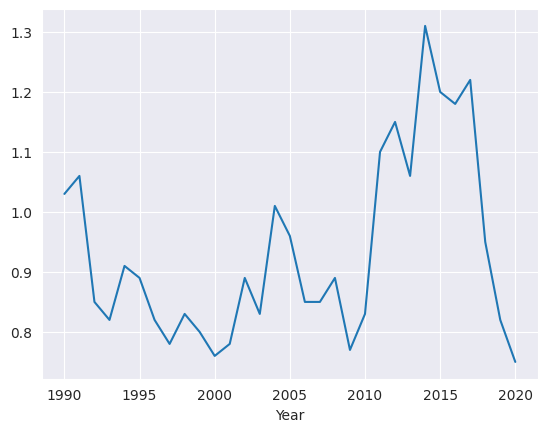

In [ ]:
spain['Pesticides'].plot();

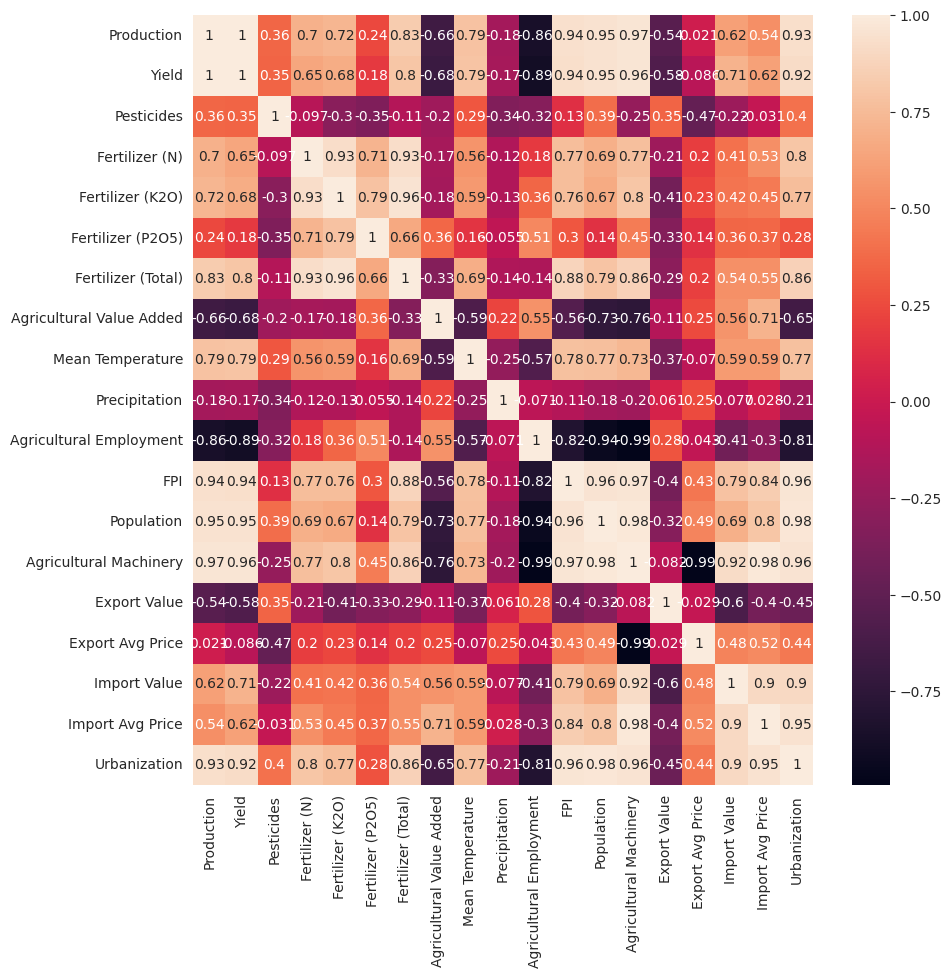

In [ ]:
fig = plt.figure(figsize = (10, 10))

corr = spain.corr()

sns.heatmap(corr, annot = True);